In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
import seaborn as sb

In [2]:
bikeshare = pd.read_csv('bikeshare_reduced.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'], 
                        index_col='Start date')

In [3]:
bikeshare_4d = bikeshare['time_diff'].resample('4D').mean()
bikeshare_4d.head()

Start date
2011-04-01 00:03:00    16.875759
2011-04-05 00:03:00    12.445972
2011-04-09 00:03:00    15.726893
2011-04-13 00:03:00    13.242193
2011-04-17 00:03:00    15.384570
Freq: 4D, Name: time_diff, dtype: float64

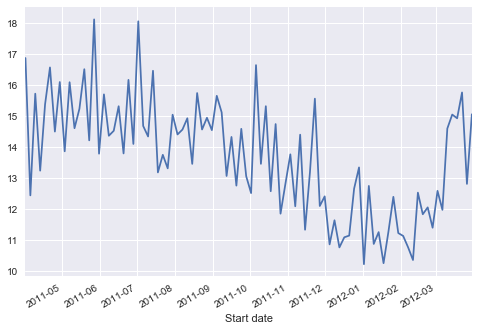

In [4]:
bikeshare_4d.plot()
plt.show()

In [5]:
bikeshare_count = bikeshare['mnth'].resample('1W').count()
bikeshare_count.head()

Start date
2011-04-03     6973
2011-04-10    16718
2011-04-17    17546
2011-04-24    23254
2011-05-01    28332
Freq: W-SUN, Name: mnth, dtype: int64

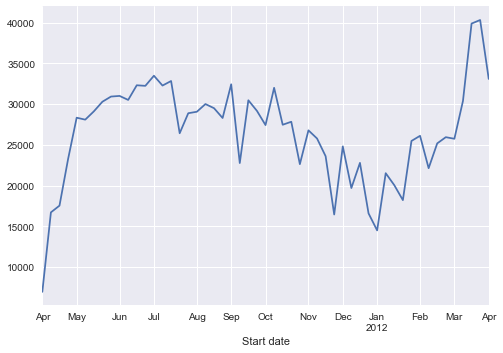

In [6]:
bikeshare_count.plot()

In [7]:
bikeshare_reg = bikeshare[bikeshare['Member Type'] == 'Registered']
bikeshare_cas = bikeshare[bikeshare['Member Type'] == 'Casual']

In [8]:
bikeshare_count_reg = bikeshare_reg.groupby(['start_date_short'])['mnth'].count()
bikeshare_count_cas = bikeshare_cas.groupby(['start_date_short'])['mnth'].count()

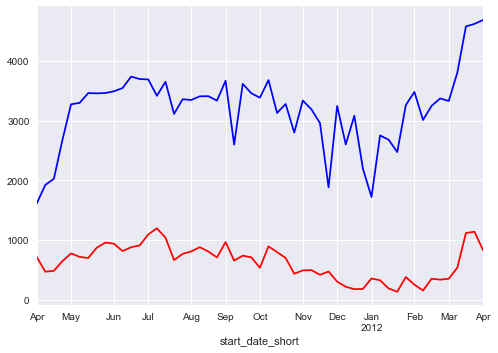

In [9]:
bikeshare_count_reg.resample('1W').mean().plot(c='blue')
bikeshare_count_cas.resample('1W').mean().plot(c='red')

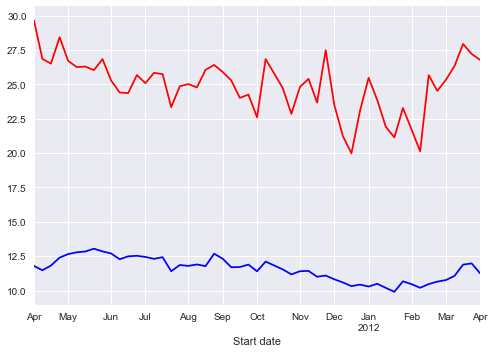

In [10]:
bikeshare_reg['time_diff'].resample('1W').mean().plot(c='blue')
bikeshare_cas['time_diff'].resample('1W').mean().plot(c='red')

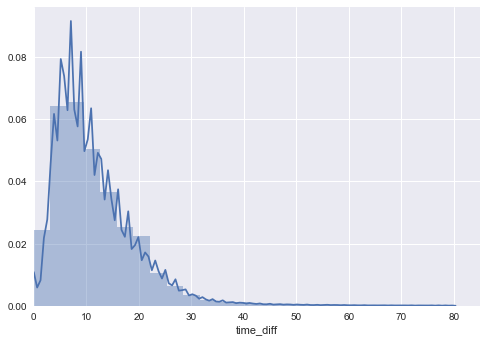

In [11]:
sb.distplot(bikeshare_reg['time_diff'], bins=25)
plt.xlim([0,85])
plt.show()

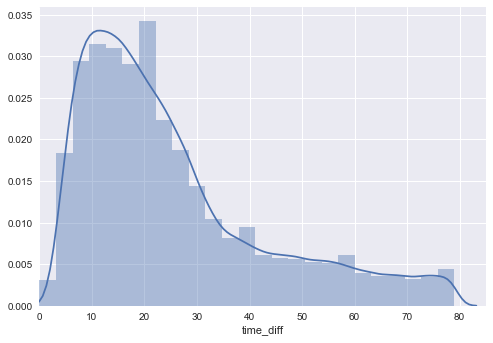

In [12]:
sb.distplot(bikeshare_cas['time_diff'], bins=25)
plt.xlim([0,85])
plt.show()